Training Quantum RNN with Strong Entanglement...
Epoch 1 | Avg Loss: 5.7253
Epoch 2 | Avg Loss: 6.4612
Epoch 3 | Avg Loss: 3.0473
Epoch 4 | Avg Loss: 7.1057
Epoch 5 | Avg Loss: 3.5772
Epoch 6 | Avg Loss: 3.6805
Epoch 7 | Avg Loss: 1.1373
Epoch 8 | Avg Loss: 5.0642
Epoch 9 | Avg Loss: 3.3195
Epoch 10 | Avg Loss: 5.8971
Epoch 11 | Avg Loss: 4.5014
Epoch 12 | Avg Loss: 4.6562
Epoch 13 | Avg Loss: 2.5525
Epoch 14 | Avg Loss: 3.1590
Epoch 15 | Avg Loss: 5.7630
Epoch 16 | Avg Loss: 3.8643
Epoch 17 | Avg Loss: 6.4464
Epoch 18 | Avg Loss: 7.0757
Epoch 19 | Avg Loss: 3.4745
Epoch 20 | Avg Loss: 5.2354
Epoch 21 | Avg Loss: 5.7983
Epoch 22 | Avg Loss: 6.5577
Epoch 23 | Avg Loss: 6.4263
Epoch 24 | Avg Loss: 5.9782
Epoch 25 | Avg Loss: 5.3863
Epoch 26 | Avg Loss: 2.6214
Epoch 27 | Avg Loss: 4.9345
Epoch 28 | Avg Loss: 1.9993
Epoch 29 | Avg Loss: 1.1241
Epoch 30 | Avg Loss: 1.5912


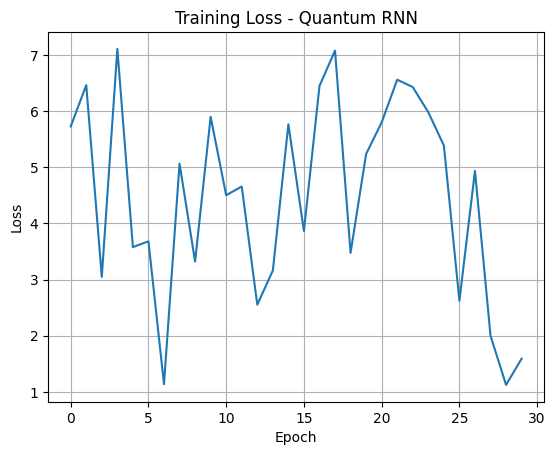

Seq 1: Pred=0.914, PredLabel=1 | True=1
Seq 2: Pred=-0.695, PredLabel=0 | True=1
Seq 3: Pred=-0.379, PredLabel=0 | True=0
Seq 4: Pred=0.156, PredLabel=0 | True=0
Seq 5: Pred=0.836, PredLabel=1 | True=1
Seq 6: Pred=-0.379, PredLabel=0 | True=1
Seq 7: Pred=0.188, PredLabel=0 | True=0
Seq 8: Pred=0.744, PredLabel=1 | True=1
Seq 9: Pred=0.842, PredLabel=1 | True=1
Seq 10: Pred=-0.172, PredLabel=0 | True=0
Seq 11: Pred=0.594, PredLabel=1 | True=1
Seq 12: Pred=0.820, PredLabel=1 | True=1
Seq 13: Pred=0.574, PredLabel=1 | True=1
Seq 14: Pred=-0.383, PredLabel=0 | True=0
Seq 15: Pred=0.762, PredLabel=1 | True=1
Seq 16: Pred=0.703, PredLabel=1 | True=1
Seq 17: Pred=-0.486, PredLabel=0 | True=0
Seq 18: Pred=0.660, PredLabel=1 | True=1
Seq 19: Pred=0.816, PredLabel=1 | True=1
Seq 20: Pred=0.840, PredLabel=1 | True=1
Final Training Accuracy: 90.00%


In [ ]:
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
import matplotlib.pyplot as plt

# Quantum device setup: More shots for noise reduction, analytic mode off
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits, shots=1024)

# Quantum RNN cell with layered entanglement and trainable rotations
def qrnn_cell(x, weights):
    qml.AngleEmbedding(x, wires=[0, 1])
    qml.StronglyEntanglingLayers(weights, wires=[0, 1])

# QNode definition
@qml.qnode(dev, interface="autograd")
def quantum_forward(inputs, weights):
    for i in range(len(inputs)):
        qrnn_cell(inputs[i], weights[i])
    return qml.expval(qml.PauliZ(0))

# Generate synthetic training data
def generate_data(num_sequences):
    X = [np.random.rand(3, 2) * np.pi for _ in range(num_sequences)]  # amplitude scaled
    y = [int(np.mean(seq[:, 0] + seq[:, 1]) > 2.5) for seq in X]  # smarter label logic
    return X, y

# Binary cross-entropy loss
def binary_cross_entropy(pred, target):
    pred = pnp.clip(pred, 1e-6, 1 - 1e-6)
    return -target * pnp.log(pred) - (1 - target) * pnp.log(1 - pred)

# Training loop with Adam optimizer
np.random.seed(42)
X_train, y_train = generate_data(20)
sequence_length = 3       # since each input has 3 time steps
n_layers = 3
weights = pnp.array(
    np.random.normal(0, 0.1, (sequence_length, n_layers, n_qubits,3)),
    requires_grad=True
)
opt = qml.AdamOptimizer(stepsize=0.1)
epochs = 30

print("Training Quantum RNN with Strong Entanglement...")
history = []
for epoch in range(epochs):
    loss = 0
    for i in range(len(X_train)):
        def cost(w):
            pred = quantum_forward(X_train[i], w)
            return binary_cross_entropy(pred, y_train[i])
        weights = opt.step(cost, weights)
        loss += cost(weights)
    avg_loss = loss / len(X_train)
    history.append(avg_loss)
    print(f"Epoch {epoch+1} | Avg Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss - Quantum RNN")
plt.grid(True)
plt.show()

# Final predictions
correct = 0
for i, seq in enumerate(X_train):
    pred = quantum_forward(seq, weights)
    label = 1 if pred >= 0.5 else 0
    correct += (label == y_train[i])
    print(f"Seq {i+1}: Pred={pred:.3f}, PredLabel={label} | True={y_train[i]}")

accuracy = correct / len(X_train)
print(f"Final Training Accuracy: {accuracy * 100:.2f}%")


In [ ]:
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
import matplotlib.pyplot as plt
from data import imdb_dataset
from sklearn.model_selection import train_test_split

# Quantum device setup: More shots for noise reduction, analytic mode off
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits, shots=1024)

# Quantum RNN cell with layered entanglement and trainable rotations
def qrnn_cell(x, weights):
    qml.AngleEmbedding(x, wires=[0, 1])
    qml.StronglyEntanglingLayers(weights, wires=[0, 1])

# QNode definition
@qml.qnode(dev, interface="autograd")
def quantum_forward(inputs, weights):
    for i in range(len(inputs)):
        qrnn_cell(inputs[i], weights[i])
    return qml.expval(qml.PauliZ(0))

# Generate synthetic training data
def generate_data(num_sequences):
    X = [np.random.rand(3, 2) * np.pi for _ in range(num_sequences)]  # amplitude scaled
    y = [int(np.mean(seq[:, 0] + seq[:, 1]) > 2.5) for seq in X]  # smarter label logic
    return X, y

# Binary cross-entropy loss
def binary_cross_entropy(pred, target):
    pred = pnp.clip(pred, 1e-6, 1 - 1e-6)
    return -target * pnp.log(pred) - (1 - target) * pnp.log(1 - pred)

# Training loop with Adam optimizer
np.random.seed(42)
X_train, y_train = generate_data(20)
sequence_length = 3       # since each input has 3 time steps
n_layers = 3
weights = pnp.array(
    np.random.normal(0, 0.1, (sequence_length, n_layers, n_qubits,3)),
    requires_grad=True
)
opt = qml.AdamOptimizer(stepsize=0.1)
epochs = 5

print("Training Quantum RNN with Strong Entanglement...")
history = []
for epoch in range(epochs):
    loss = 0
    for i in range(len(X_train)):
        def cost(w):
            pred = quantum_forward(X_train[i], w)
            return binary_cross_entropy(pred, y_train[i])
        weights = opt.step(cost, weights)
        loss += cost(weights)
    avg_loss = loss / len(X_train)
    history.append(avg_loss)
    print(f"Epoch {epoch+1} | Avg Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss - Quantum RNN")
plt.grid(True)
plt.show()

# Final predictions
correct = 0
for i, seq in enumerate(X_train):
    pred = quantum_forward(seq, weights)
    label = 1 if pred >= 0.5 else 0
    correct += (label == y_train[i])
    print(f"Seq {i+1}: Pred={pred:.3f}, PredLabel={label} | True={y_train[i]}")

accuracy = correct / len(X_train)
print(f"Final Training Accuracy: {accuracy * 100:.2f}%")
